In [38]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [92]:
# loading data

df = pd.read_csv(r'C:\Users\pruthvi katware\machine learning\advertising.csv')
df.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0


In [90]:
df.shape

(200, 4)

In [91]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [40]:
# checking for null values

df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

No null values

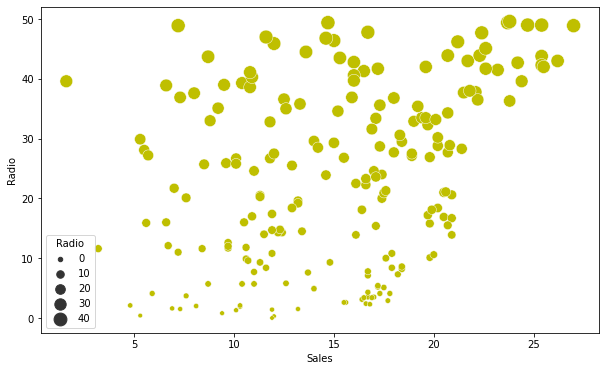

In [42]:
# Radio advertise vs Sales

plt.figure(figsize=(10,6))
sns.scatterplot(x='Sales', y='Radio', size='Radio', data=df,markers=True,sizes=(20,200),color='y')
plt.show()

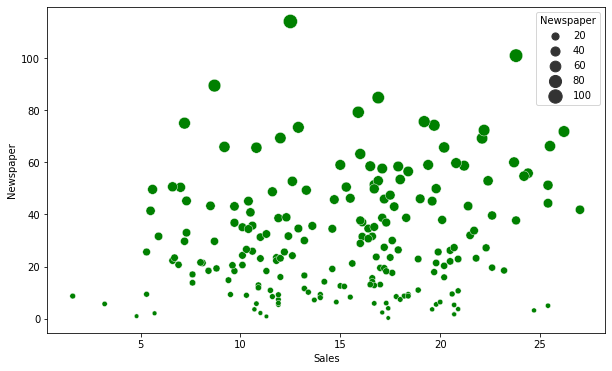

In [43]:
# Newspaper advertise vs Sales

plt.figure(figsize=(10,6))
sns.scatterplot(x='Sales', y='Newspaper', size='Newspaper', data=df,markers=True,sizes=(20,200),color='g')
plt.show()

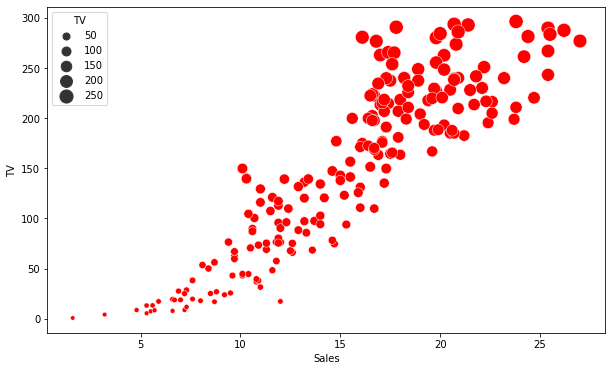

In [141]:
# TV advertise vs Sales

plt.figure(figsize=(10,6))
sns.scatterplot(x='Sales', y='TV', size='TV', data=df,markers=True,sizes=(20,200),color='r')
plt.show()

In [44]:
# Finding the correlaion

correlation = df.corr()
correlation['Sales']

TV           0.901208
Radio        0.349631
Newspaper    0.157960
Sales        1.000000
Name: Sales, dtype: float64

Here also we see that TV is Highly correlated

### heatmap fro coorelation


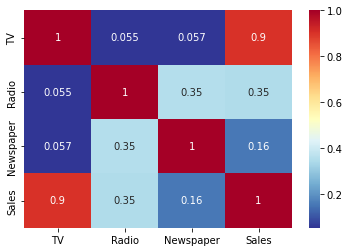

In [142]:
sns.heatmap(correlation,cmap='RdYlBu_r',annot=True)
plt.show()

Here from all above plots we can see that there is more corelation in Tv Advertisement and Sales.
TV advertisement is actually helping more to improve the sales

### As we see that mostly TV adverstising is affecting the sales so we will make the prediction model on it

In [155]:
x_tv = df.loc[:,['TV']]  # dataframe

#x_tv = df[['TV']]

In [157]:
y_tv = df.loc[:,'Sales']   # series
# y_tv = df['Sales']

In [158]:
# Training the model
model_tv = LinearRegression()

In [163]:
# fitting the model

model_tv.fit(x_tv,y_tv)

LinearRegression()

In [164]:
model_tv.score(x_tv,y_tv)*100

81.21757029987414

In [171]:
# Prediction of the TV advertise and Sales

model_tv.predict([[232.1]])


C:\Users\pruthvi katware\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.84819471])

In [169]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


## ==================================================================

## sales Prediction model for multiple values


In [130]:
x = np.array(df.iloc[:,:3])
y = np.array(df['Sales'])


xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=42)

### training model

In [131]:
model = LinearRegression()
model.fit(xtrain,ytrain)


LinearRegression()

### check the accuracy

In [132]:
model.score(xtest,ytest)*100

90.91484341849798

In [133]:
#checking the prediction of our model by inputting the setof values from training set

f = np.array([[230.1,37.8,69.2]])

model.predict(f)


array([21.5057118])

In [134]:
# checking for multiple values (selecting 5 values)

f1 = np.empty(shape=(1,3))

for i in range(5):
    f1 = np.append(f1,df.iloc[[i],:3],axis=0)

f1=f1[1:]

In [135]:
model.predict(f1)

array([21.5057118 , 11.52255765, 10.9293974 , 17.56824551, 16.00504458])

In [136]:
df[:5]

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
